# Session 3 : Supervised learning (2/3)

## Preliminaries

Run the script `datasets.py` like you did in the last notebook to load the functions used to generate artificial datasets.

In [1]:
%run datasets.py

## Linear Models for classification

In [2]:
# use the make_forge() function to generate a set of 500 
# points X and their labels y for classification.

# We can pass a parameter to make_forge() to indicate the 
# number of points we want.
X, y = make_forge(500)
print("X has", len(X), "points.")

X has 500 points.


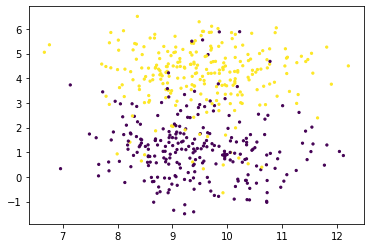

In [3]:
# this snippet prints the points on a 2d space
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c=y, s=5)
plt.show()

As we can see, the dataset does not seem to be linearly separable. We are going to use a logistic regression model to create a classifier. Add the missing pieces of code to create a model and train it. Print its accuracy.

In [4]:
from sklearn.linear_model import LogisticRegression

# first thing before creating a model => Separate train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Training set has", len(X_train), "points.")
print("Test     set has", len(X_test), "points.")

# then we can create a model
model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)
print("Model accuracy:", model.score(X_test, y_test))

Training set has 375 points.
Test     set has 125 points.
Model accuracy: 0.888


Now print the decision boundary of this model like we did in the last notebook. Save the image (with code or the button in the GUI) for future model comparison. Find also the number of misclassified examples by your model.

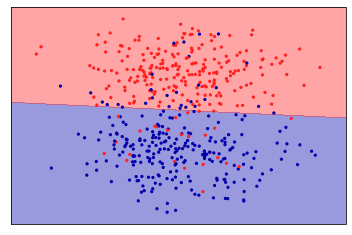

In [5]:
#plot the decision boundary
%run plots.py
plot_2d_separator(model, X, y, fill=True, eps=0.5, alpha=0.4)
plt.savefig("decision-boundary.png")

In [6]:
# Compute number of misclassified points:

# First test if the predicted class is equal to the true
# label. We get an array of booleans, each one indicates if
# test_point[i] is misclassified.
is_misclassified = model.predict(X_test) != y_test

# Then, we use the fact that True is evaluated as 1 and False
# as 0. So if we sum all booleans, we get the number of times
# there is a True value in the aray, which is also the
# number of misclassified points.
n_misclassified = sum(is_misclassified)
print("Number of misclassified points:", n_misclassified)

Number of misclassified points: 14


Linear models for classification can also have a regularization. Read the source code of `LogisticRegression` to find the parameter used to control the regularization. Create other models (at least 4) with different values for this parameter. Print the accuracy of each of your models, the number of misclassified examples and the decision boundary. Save the image for each model.

Model 1
  C = 0.0002
  Accuracy =  0.88
  Misclassified =  15
Model 2
  C = 0.0005
  Accuracy =  0.912
  Misclassified =  11
Model 3
  C = 0.001
  Accuracy =  0.904
  Misclassified =  12
Model 4
  C = 0.01
  Accuracy =  0.888
  Misclassified =  14


Text(0.5, 1.0, 'C = 0.01 / Acc = 0.888')

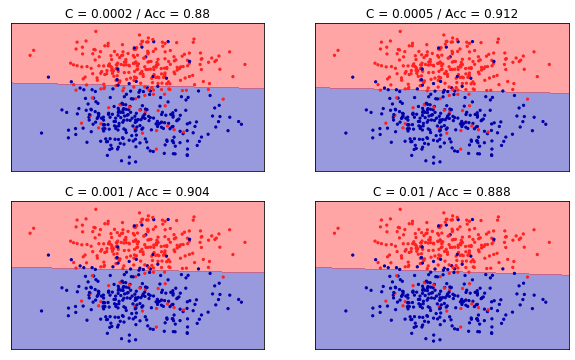

In [7]:
# Create some LogisticRegression() models with regularization
# Visualize their respective decision boundary

# instead of saving each images, I plot the decision
# boundaries in a 2x2 subplots figure (easier to see the
# differences between boundaries)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(10,6))

# model 1
c = 0.0002
model_1 = LogisticRegression(solver="lbfgs", C=c)
model_1.fit(X_train, y_train)
acc = model_1.score(X_test, y_test)
print("Model 1")
print("  C =", c)
print("  Accuracy = ", acc)
print("  Misclassified = ", 
      sum(model_1.predict(X_test) != y_test))
plot_2d_separator(model_1, X, y, ax=ax[0][0],
                  fill=True, eps=0.5, alpha=0.4)
ax[0][0].set_title("C = {} / Acc = {}".format(c, acc))

# model 2
c = 0.0005
model_2 = LogisticRegression(solver="lbfgs", C=c)
model_2.fit(X_train, y_train)
acc = model_2.score(X_test, y_test)
print("Model 2")
print("  C =", c)
print("  Accuracy = ", acc)
print("  Misclassified = ", 
      sum(model_2.predict(X_test) != y_test))
plot_2d_separator(model_2, X, y, ax=ax[0][1],
                  fill=True, eps=0.5, alpha=0.4)
ax[0][1].set_title("C = {} / Acc = {}".format(c, acc))

# model 3
c = 0.001
model_3 = LogisticRegression(solver="lbfgs", C=c)
model_3.fit(X_train, y_train)
acc = model_3.score(X_test, y_test)
print("Model 3")
print("  C =", c)
print("  Accuracy = ", acc)
print("  Misclassified = ", 
      sum(model_3.predict(X_test) != y_test))
plot_2d_separator(model_3, X, y, ax=ax[1][0],
                  fill=True, eps=0.5, alpha=0.4)
ax[1][0].set_title("C = {} / Acc = {}".format(c, acc))

# model 4
c = 0.01
model_4 = LogisticRegression(solver="lbfgs", C=c)
model_4.fit(X_train, y_train)
acc = model_4.score(X_test, y_test)
print("Model 4")
print("  C =", c)
print("  Accuracy = ", acc)
print("  Misclassified = ", 
      sum(model_4.predict(X_test) != y_test))
plot_2d_separator(model_4, X, y, ax=ax[1][1],
                  fill=True, eps=0.5, alpha=0.4)
ax[1][1].set_title("C = {} / Acc = {}".format(c, acc))

Compare the images of decision boundaries you have saved. Can you see the influence of the regularization parameter ? Can this parameter help to prevent overfitting or underfitting ?

**Answer** : the parameter `C` is the inverse of the regularization strength. This means that when `C=0.0002`, the regularization
is stronger than when `C=0.01`. With the decision boundaries, we can see that when the regularization is weak (`C=0.01`), the decision boundary is close to our data (the direction of the boundary is almost the same as the data, like a \ line) but when it is strong (`C=0.0002`), the boundary does not align with the data (the line is more horizontal and is shifted upwards).
Like we said before, we need to find a `C` that balances the effect of the regularization. In our case, the best accuracy is obtained with `C=0.0005`.

Visualize the weight $w$ and $b$ learned by your models. Does the regularization parameter has an influence on the values of theses coefficients ?

In [8]:
print("Model 1")
print("  w =", model_1.coef_)
print("  b =", model_1.intercept_)
print("Model 2")
print("  w =", model_2.coef_)
print("  b =", model_2.intercept_)
print("Model 3")
print("  w =", model_3.coef_)
print("  b =", model_3.intercept_)
print("Model 4")
print("  w =", model_4.coef_)
print("  b =", model_4.intercept_)

Model 1
  w = [[0.00265811 0.05117718]]
  b = [-0.18930327]
Model 2
  w = [[0.00623336 0.11665172]]
  b = [-0.39922431]
Model 3
  w = [[0.01134389 0.20406361]]
  b = [-0.68310364]
Model 4
  w = [[0.05199934 0.72414992]]
  b = [-2.4762629]


**Answer** : yes, `C` has an effect on the values of $w$ and $b$. We can see that, the stronger the regularization, the lower the values of $w$ and $b$. This is what we were expecting because the regularization tries to minimize the norm $\left\lVert W \right\rVert$. So if the model needs to optimize a lot the norm of $W$, the only option is to decrease the values of $w$ and $b$.

## Decision Trees

Let's first see a toy example to visualize what are decision trees and how they create decision boundaries in the dataset. Run the following pieces of code, but first, run these two commands in a terminal in your machine (to install the software that can generate decision trees).

###### Python packages (if needed, add --proxy http://proxy-url:port)

`sudo pip3 install graphviz`

`sudo pip3 install pillow`

###### Ubuntu package

`sudo apt-get install graphviz`

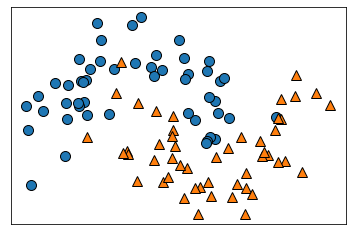

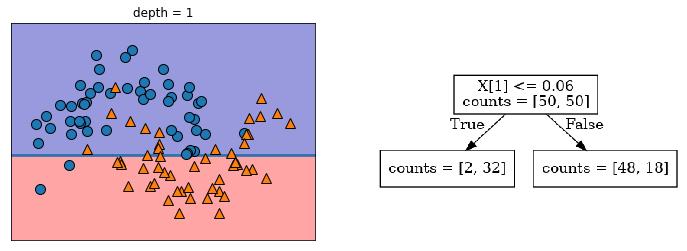

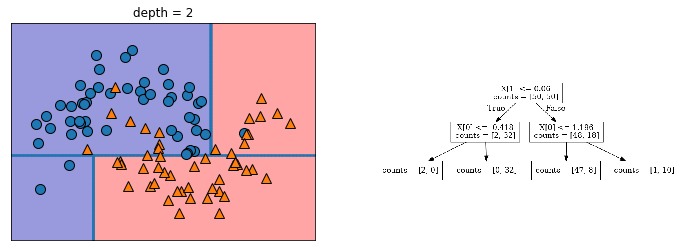

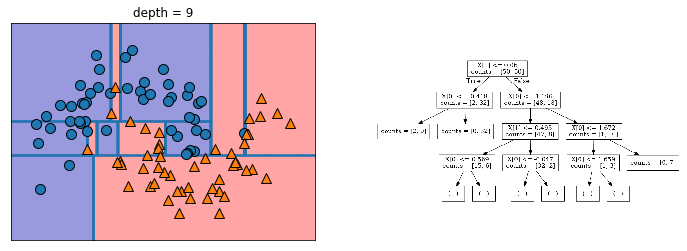

In [9]:
# now run this cell
%run plot_interactive_tree.py
plot_tree_progressive()

Now let's use a decision tree on a real dataset.

In [10]:
# load the breast cancer dataset. Separate it into
# a training and a test file

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# create and train a decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [11]:
# compute the accuracy on training and test set. What can
# you say about these scores ?
training_accuracy = tree.score(X_train, y_train)
test_accuracy = tree.score(X_test, y_test)
print("Training accuracy:", training_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.8811188811188811


**Answer** : we can see that the training accuracy is perfect (equal to 1) while the test accuracy is not. This means that our decision tree model is overfitting (good on training set, bad on test set).

In [12]:
# look at the documentation of DecisionTreeClassifier() and
# train a model named tree that only has a depth of 4
#?DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

training_accuracy = tree.score(X_train, y_train)
test_accuracy = tree.score(X_test, y_test)
print("Training accuracy:", training_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.9929577464788732
Test accuracy: 0.8951048951048951


**Answer** : now our training accuracy has decreased while our test accuracy has increased. This means that reducing the maximum depth of our decision tree model helps to prevent overfitting.

In [13]:
# now we can save the DecisionTreeClassifier model as
# a tree image.
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="breast_tree.dot", 
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

In [14]:
# with ls, you can see that the file breast_tree.dot has
# been created
!ls -oght

total 124K
-rw-r--r--. 1 2.6K Nov 10 18:07 breast_tree.dot
-rw-r--r--. 1  47K Nov 10 18:07 tmp.png
-rw-r--r--. 1  893 Nov 10 18:07 tmp
-rw-r--r--. 1  28K Nov 10 18:07 decision-boundary.png
-rw-r--r--. 1  15K Nov 10 18:06 session-3-solutions.ipynb
-rw-r--r--. 1 5.0K Nov 10 18:01 plot_interactive_tree.py
-rw-r--r--. 1 7.3K Nov 10 17:30 session-3.ipynb
-rw-r--r--. 1 1.7K Oct  4 07:06 datasets.py
-rw-r--r--. 1 1.9K Oct  4 07:06 plots.py


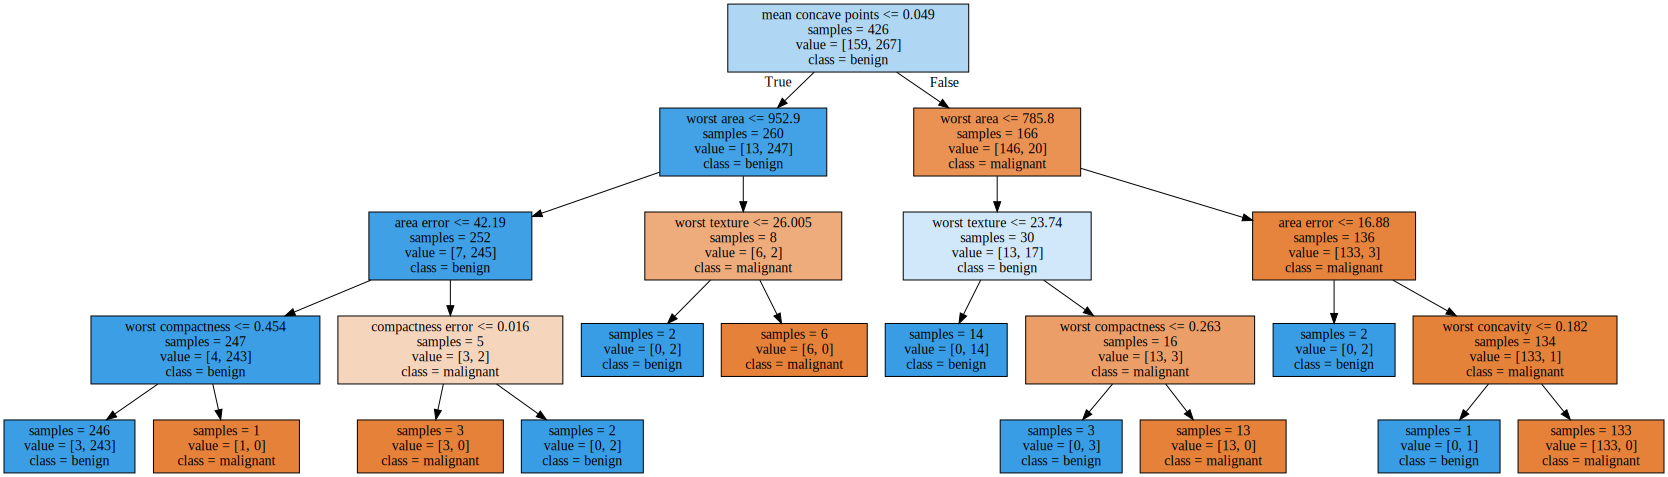

In [15]:
# we can visualize this .dot image with graphviz
import graphviz
with open("breast_tree.dot") as f:
    breast_tree = f.read()
graphviz.Source(breast_tree)

(0, 1)

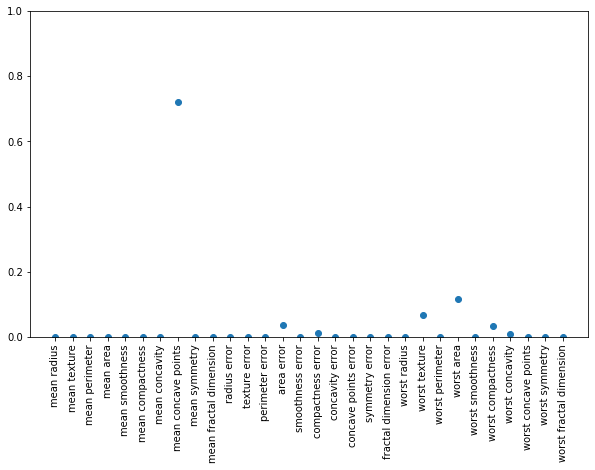

In [16]:
# we can visualize the importance of each features
# learned by our model
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0,1)

**Answer** : "Mean concave points" and "worst area" are the most discriminative attributes in the decision tree.